# Penguin Species Differentiation: Sex, Culmen Length (mm), and Culmen Depth (mm)

By Cooper Taffe, Charlene Liu, Paritta Harinsuit


Dec 5, 2024

## Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(3354354524)

# Load the dataset
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

# Saving simple species names
penguins["Species"] = penguins["Species"].str.split().str.get(0)
selected_columns = ["Species", "Island", "Region", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex", "Delta 13 C (o/oo)", "Delta 15 N (o/oo)"]
penguins = penguins[selected_columns] #saving only relavent columns

# Split the data into training and test sets (80/20 split) before cleaning
X = penguins.drop(columns='Species').copy()  # All columns except 'Species'
y = penguins['Species'].copy()  # Target is 'Species'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the cleaning function
def clean_data(X, y=None):
    """
    Cleans the dataset by handling missing values, removing unusual placeholders,
    and optionally aligning the target variable if provided.
    """
    # Drop rows with missing values
    X_cleaned = X.dropna()

    # Remove rows that arent male or female in 'Sex' column
    if "Sex" in X_cleaned.columns:
        X_cleaned = X_cleaned[X_cleaned["Sex"] != "."]

    # Align target variable if provided
    if y is not None:
        y = y.loc[X_cleaned.index]

    return X_cleaned, y

# Clean the training and testing sets
X_train_cleaned, y_train_cleaned = clean_data(X_train, y_train)
X_test_cleaned, y_test_cleaned = clean_data(X_test, y_test)

## Exploratory Analysis

In [ ]:
import matplotlib.pyplot as plt

# Combine cleaned training and test sets to recreate the complete cleaned dataset
penguins_cleaned = pd.concat([X_train_cleaned, X_test_cleaned])
penguins_cleaned['Species'] = pd.concat([y_train, y_test])

# Defining a Summary Table Function
def penguin_summary_table(group_cols, value_cols):
  """
  returns the data frame with the mean of value_cols grouped by group_cols
  """
  summary = penguins_cleaned.groupby(group_cols)[value_cols].mean().round(2)
  return summary

In [ ]:
# Creating summary tables grouping by sex
penguin_summary_table(["Species", "Sex"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Body Mass (g)", "Flipper Length (mm)", "Delta 13 C (o/oo)", "Delta 15 N (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  Body Mass (g)  \
Species   Sex                                                         
Adelie    0                 37.21              17.62        3366.55   
          1                 40.43              19.06        4053.68   
Chinstrap 0                 46.57              17.59        3527.21   
          1                 51.07              19.25        3938.64   
Gentoo    0                 45.56              14.24        4679.74   
          1                 49.51              15.72        5488.75   

               Flipper Length (mm)  Delta 13 C (o/oo)  Delta 15 N (o/oo)  
Species   Sex                                                             
Adelie    0                 187.92             -25.79               8.79  
          1                 192.84             -25.83               8.93  
Chinstrap 0                 191.74             -24.57               9.25  
          1                 199.73             -24.55               9.46  
Gentoo    0                 212.71             -26.20               8.19  
          1                 221.53             -26.17               8.30

In [ ]:
# Creating summary tables grouping island
penguin_summary_table(["Species", "Island"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Body Mass (g)", "Flipper Length (mm)", "Delta 13 C (o/oo)", "Delta 15 N (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  Body Mass (g)  \
Species   Island                                                            
Adelie    Biscoe                  38.98              18.37        3709.66   
          Dream                   38.40              18.21        3684.62   
          Torgersen               39.06              18.42        3717.44   
Chinstrap Dream                   48.79              18.40        3729.85   
Gentoo    Biscoe                  47.57              14.99        5091.10   

                     Flipper Length (mm)  Delta 13 C (o/oo)  Delta 15 N (o/oo)  
Species   Island                                                                
Adelie    Biscoe                  188.80             -25.92               8.82  
          Dream                   190.10             -25.75               8.95  
          Torgersen               192.16             -25.79               8.79  
Chinstrap Dream                   195.67             -24.56               9.36  
Gentoo    Biscoe                  217.19             -26.18               8.25

Variables relating to the penguins size vary more by sex within species than by island, so this could be the better choice for a qualitative variable. However some species only exist on certain islands so that could be a definite predictor for species. Overall summary tables don’t show much about the extent of the overlap of data between species, since they only provide the mean. We'll move on to visualizations to obtain more information about the distribution of the data.

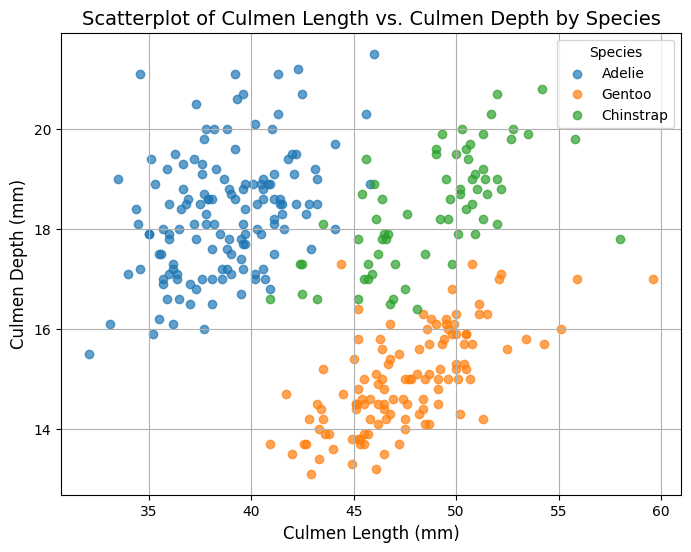

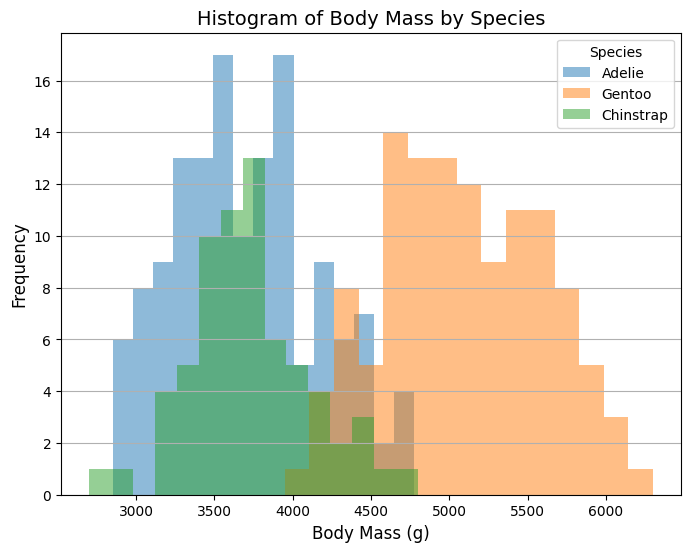

<Figure size 800x600 with 0 Axes>

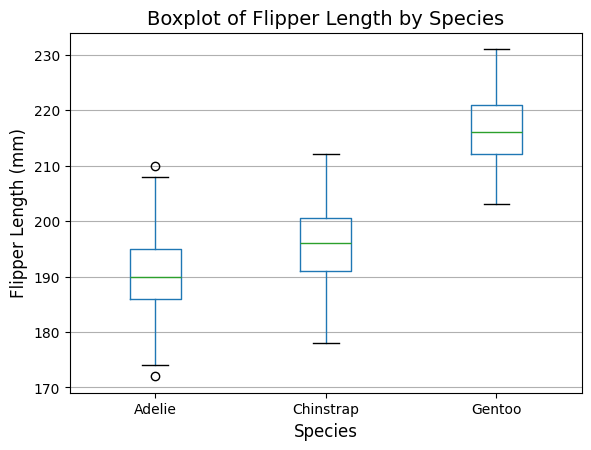

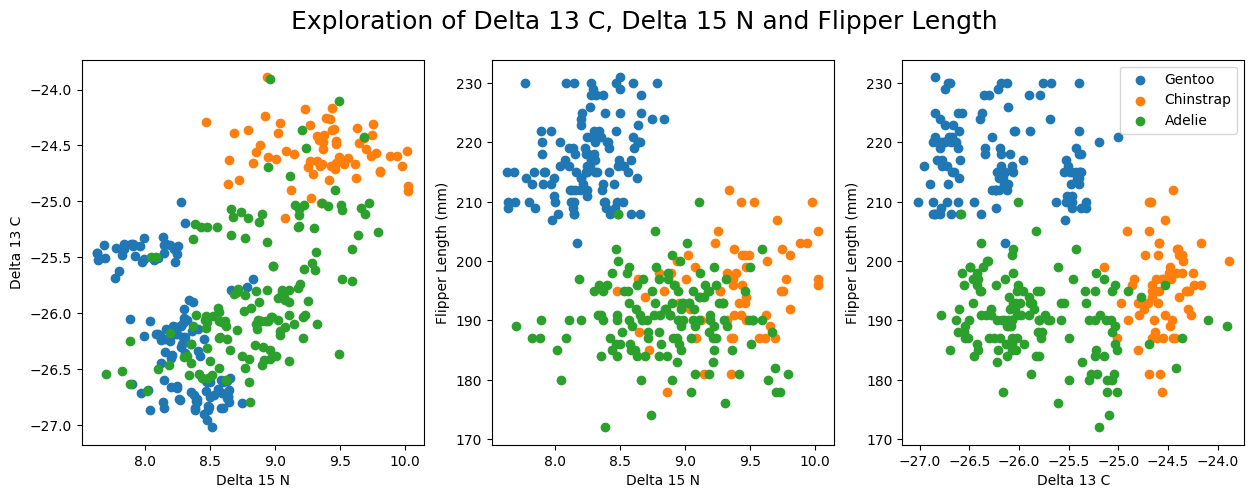

In [ ]:
# 1. Scatterplot: Culmen Length vs Culmen Depth
plt.figure(figsize=(8, 6))
for species in penguins_cleaned['Species'].unique():
    subset = penguins_cleaned[penguins_cleaned['Species'] == species]
    plt.scatter(subset['Culmen Length (mm)'], subset['Culmen Depth (mm)'], label=species, alpha=0.7)
plt.xlabel('Culmen Length (mm)', fontsize=12)
plt.ylabel('Culmen Depth (mm)', fontsize=12)
plt.title('Scatterplot of Culmen Length vs. Culmen Depth by Species', fontsize=14)
plt.legend(title="Species")
plt.grid(True)
plt.show()

# 2. Histogram: Distribution of Body Mass
plt.figure(figsize=(8, 6))
for species in penguins_cleaned['Species'].unique():
    subspecies = penguins_cleaned[penguins_cleaned['Species'] == species]
    plt.hist(subspecies['Body Mass (g)'], label=species, alpha=0.5, bins=15)
plt.xlabel('Body Mass (g)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Body Mass by Species', fontsize=14)
plt.legend(title="Species")
plt.grid(axis='y')
plt.show()

# 3. Boxplot: Flipper Length by Species
plt.figure(figsize=(8, 6))
penguins_cleaned.boxplot(column='Flipper Length (mm)', by='Species', grid=False)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Flipper Length (mm)', fontsize=12)
plt.title('Boxplot of Flipper Length by Species', fontsize=14)
plt.suptitle('')
plt.grid(axis='y')
plt.show()

# 4. Exploration of Delta 13 C and Delta 15 N
fig, ax = plt.subplots(1,3, figsize = (15,5))
s = set(penguins_cleaned["Species"])
for i in s:
    subspecies = penguins_cleaned[penguins_cleaned['Species'] == i]
    ax[0].scatter(subspecies["Delta 15 N (o/oo)"], subspecies["Delta 13 C (o/oo)"], label = i)
ax[0].set_ylabel("Delta 13 C")
ax[0].set_xlabel("Delta 15 N")
for i in s:
    subspecies = penguins_cleaned[penguins_cleaned['Species'] == i]
    ax[1].scatter(subspecies["Delta 15 N (o/oo)"], subspecies["Flipper Length (mm)"], label = i)
ax[1].set_xlabel("Delta 15 N")
ax[1].set_ylabel("Flipper Length (mm)")
for i in s:
    subspecies = penguins_cleaned[penguins_cleaned['Species'] == i]
    ax[2].scatter(subspecies["Delta 13 C (o/oo)"], subspecies["Flipper Length (mm)"], label = i)
ax[2].set_xlabel("Delta 13 C")
ax[2].set_ylabel("Flipper Length (mm)")
fig.suptitle("Exploration of Delta 13 C, Delta 15 N and Flipper Length", fontsize=18)
plt.legend()

After creating visualizations of different quantitative features we see that culmen length versus culmen depth has fairly distinct clusters between species. When looking at the histogram of body mass and boxplots of flipper length the species have more overlap. Specifically with flipper length, the Adelie and Chinstrap penguins have very similar ranges of lengths, which would make it difficult to predict species using flipper length alone. We also created scatter plots to explore the variables relating to isotopes in the blood; some of the combinations of this figure had better clustering than others. However it seems the scatter plot of culmen length and depth has the best separation.

## Feature Selection

We performed a thorough exploratory analysis, which included scatterplots and grouped summary tables that help to visualize distinctions between the various species. Our visualizations include combinations of 6 quantitative features from the penguins data frame. After creating the visualizations, we analyzed these distributions between species leading to our final decision. We chose Sex, Culmen Length (mm), and Culmen Depth (mm) as our key features due to their leading ability to distinguish between penguin species among the available features.

#### Sex
Sex was chosen as the qualitative feature as it will provide valuable information in distinguishing penguins based on size and morphology between sexes. The summary table unveils that the culmen length (mm), culmen depth (mm) and even body mass is very different between males and femalles in each species. An example of this is how males have longer culmens than females in the Adelie species, thus highlighting differentiation. This gender-based distinction is important, as it helps the model differentiate between male and female penguins of the same species, which can significantly vary in size. Including Sex as a feature provides an extra layer of information that complements the quantitative features and aids in effective classification.
#### Culmen Length (mm)
Culmen Length (mm) was chosen as our first quantitative feature. The scatterplot comparing culmen length (mm) and culmen depth (mm) reveals that different culmen lengths correspond to different penguin species. For example, according to the scatterplot, Chinstrap penguins have the longest culmen lengths, while Adelie penguins are typically seen to have shorter culmen lengths.Furthermore, according to the summary table, the mean values of the culmen length also are different across the penguin species, demonstrating its differentiating power. For instance, Adelie penguins usually have culmen lengths of approximately 38 mm, while Chinstrap penguins have culmen lengths of approximately 50 mm. Therefore, culmen length (mm) would be an insightful predictor in distinguishing penguin species.
#### Culmen Depth (mm)
Culmen Depth (mm) was chosen as our second quantitative feature. The scatterplot comparing culmen length (mm) and culmen depth (mm) shows that culmen depths (mm) offer an additionaly layer of insight in distinguishing penguin species. For example, while Adelie penguins have much deeper culmens while the Gentoo penguins have more moderate culmen depths. The summary table further elicits that the mean values for culmen depths (mm) can also illustrate differences between species. For instance, Chinstrap penguins have culmen depths of approximately 17 mm while Adelie penguins have culmen depths of approximately 18 mm. Therefore, culmen depth (mm) also would provide valuable information to help distinguish between penguin species.










## Modeling

Performing GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1}
Best cross-validated accuracy for Logistic Regression: 0.9923076923076923

Performing GridSearchCV for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 100, 'gamma': 0.01}
Best cross-validated accuracy for Support Vector Machine: 0.9923076923076923

Performing GridSearchCV for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 3}
Best cross-validated accuracy for K-Nearest Neighbors: 0.9692307692307691


--- Logistic Regression ---
Accuracy on test data: 0.984375
Confusion Matrix:
[[27  1  0]
 [ 0 16  0]
 [ 0  0 20]]

--- Support Vector Machine ---
Accuracy on test data: 0.96875
Confusion Matrix:
[[27  1  0]
 [ 0 15  1]
 [ 0  0 20]]

--- K-Nearest Neighbors ---
Accuracy on test data: 0.984375
Confusion Matrix:
[[27  1  0]
 [ 0 16  0]
 [ 0  0 20]]


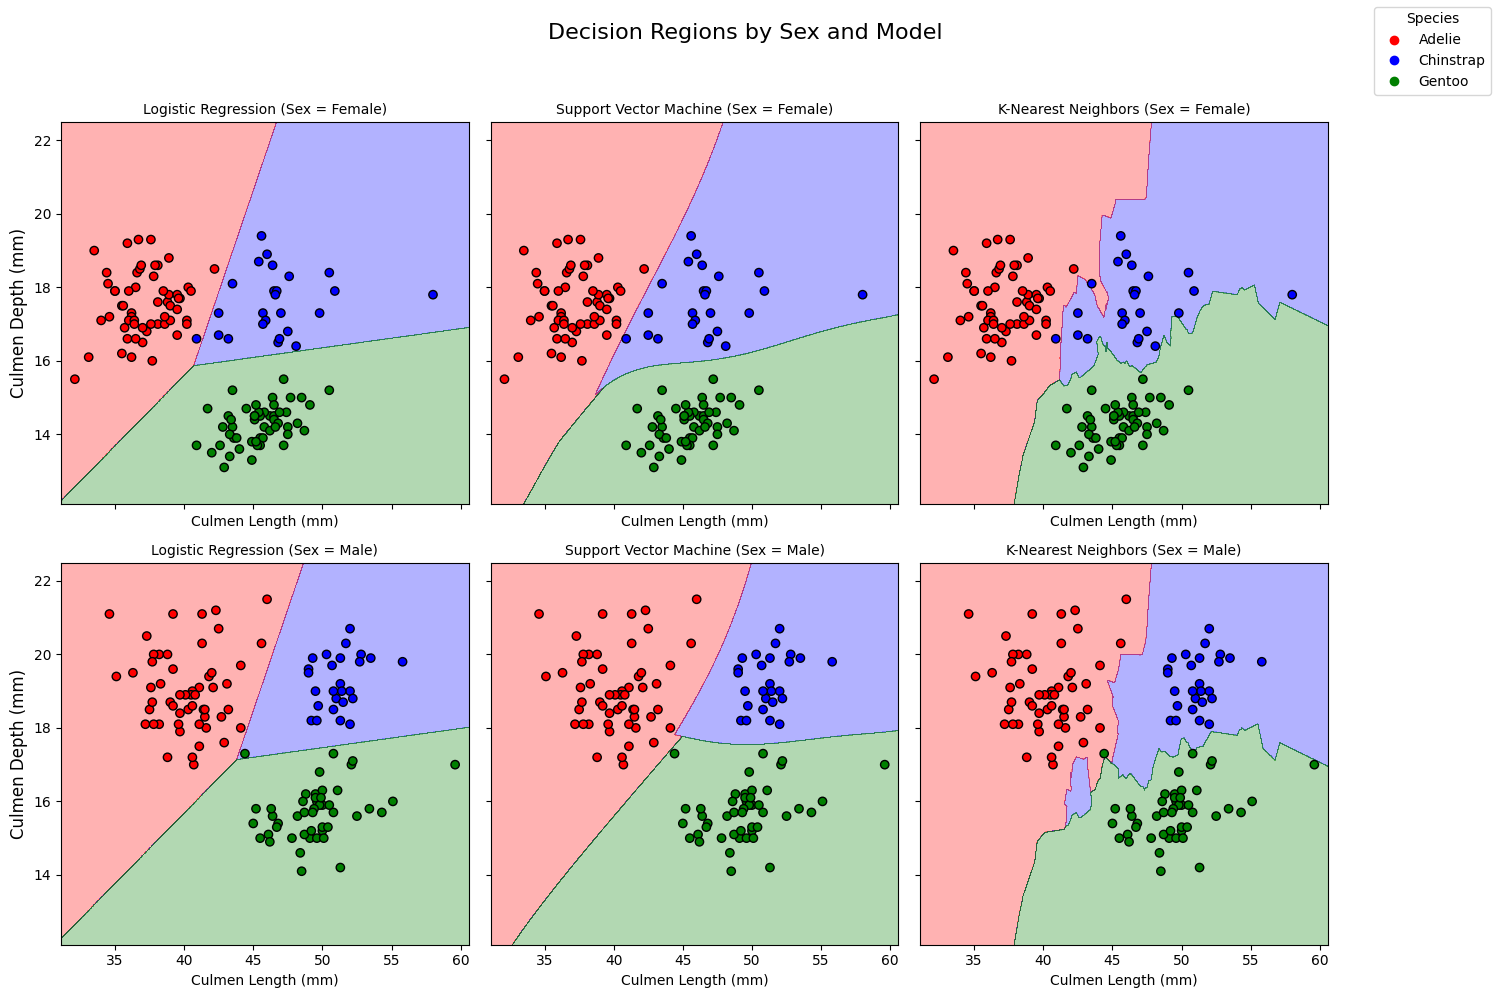

In [ ]:
# Import modules from sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV

# Using LabelEncoder(), encode 'Sex' and 'Species'
# Initalize the label encoder for 'Sex'
sex_encoder = LabelEncoder()
# Encode the 'Sex' column in the training data
X_train_cleaned["Sex"] = sex_encoder.fit_transform(X_train_cleaned["Sex"])
# Encode the 'Sex' column in the testing data
X_test_cleaned["Sex"] = sex_encoder.transform(X_test_cleaned["Sex"])
# Initialize the label encoder for 'Species'
species_encoder = LabelEncoder()
# Encode the 'Species' column in the training data
y_train_encoded = species_encoder.fit_transform(y_train_cleaned)
# Encode the 'Species' column in the testing data
y_test_encoded = species_encoder.transform(y_test_cleaned)

# Using the StandardScaler module, standardize quantitative features
scaler = StandardScaler()
# Choose the features for the modeling section from cleaned training data
X_train_model = X_train_cleaned[["Sex", "Culmen Length (mm)", "Culmen Depth (mm)"]]
# Choose the features for the modeling section from cleaned testing data
X_test_model = X_test_cleaned[["Sex", "Culmen Length (mm)", "Culmen Depth (mm)"]]

# Define the hyperparameter grids for each of the models
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]}, # Regularization strength
    "Support Vector Machine": {"C": [0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10]}, # Number of neighbors
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9, 11]} # Number of neighbors
}

# Define the base models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Logistic regression
    "Support Vector Machine": SVC(), # Support vector classifier
    "K-Nearest Neighbors": KNeighborsClassifier() # K-Nearest neighbors model
}

# Find the best hyperparameters by using GridSearchCV
best_models = {} # Initialize empty dictionary to store best models
for name, model in base_models.items():
    # Print the current model
    print(f"Performing GridSearchCV for {name}...")
    # Initialize GridSearchCV with model and parameter grid
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring="accuracy")
    # Fit to training data
    grid_search.fit(X_train_model, y_train_encoded)
    # Obtain the best model
    best_models[name] = grid_search.best_estimator_  # Store the best model
    # Print best parameters
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    # Print cross-validated accuracy
    print(f"Best cross-validated accuracy for {name}: {grid_search.best_score_}\n")

# Evaluate the models for the testing data
results = {} # Initialize an empty dictionary to the store the results
for name, model in best_models.items():
    # Predict the test data labels
    y_pred = model.predict(X_test_model)

    # Obtain accuracy score and confusion matrix
    acc = accuracy_score(y_test_encoded, y_pred) # Calculate accuracy score
    conf_matrix = confusion_matrix(y_test_encoded, y_pred) # Calculate confusion matrix

    # Store results in the results dictionary
    results[name] = {
        "Model": model,
        "Accuracy": acc,
        "Confusion Matrix": conf_matrix
    }
    # Print the results
    print(f"\n--- {name} ---")
    print(f"Accuracy on test data: {acc}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Extract trained models from the dictionary to use to plot
trained_models = {name: data["Model"] for name, data in results.items()}

# Define function plot_decision_regions_by_sex to plot the decision regions
def plot_decision_regions_by_sex(X, y, models, qualitative_col, qualitative_values, encoder):
    """
    Plots the decision regions for each model, grouped by values of the qualitative feature.
    """
    # Create subplots
    fig, axes = plt.subplots(len(qualitative_values), len(models), figsize=(15, 10), sharex=True, sharey=True)
    qualitative_map = {0: 'Female', 1: 'Male'} # Qualitative feature mapping

    # Define the global range for meshgrid across all qualitative values
    x1_min, x1_max = X["Culmen Length (mm)"].min() - 1, X["Culmen Length (mm)"].max() + 1
    x2_min, x2_max = X["Culmen Depth (mm)"].min() - 1, X["Culmen Depth (mm)"].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))

    # Loop through the qualitative values
    for i, qualitative_value in enumerate(qualitative_values):
        # Filter training data based on the qualitative feature value
        X_filtered = X[X[qualitative_col] == qualitative_value]
        y_filtered = y[X[qualitative_col] == qualitative_value]

        # Loop through all of the models
        for j, (name, model) in enumerate(models.items()):
            # Obtain the current subplot
            ax = axes[i, j]

            # Add the qualitative feature to the meshgrid
            fixed_qual_col = np.full(xx1.ravel().shape, qualitative_value)
            grid_data = pd.DataFrame({
                "Sex": fixed_qual_col,
                "Culmen Length (mm)": xx1.ravel(),
                "Culmen Depth (mm)": xx2.ravel()
            })

            # Predict the meshgrid labels
            Z = model.predict(grid_data)
            Z = Z.reshape(xx1.shape)

            # Plot the decision boundary with contour plot
            colors = ('red', 'blue', 'green') # Set colors for decision regions
            cmap = ListedColormap(colors[:len(np.unique(y))]) # Make a colormap
            ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # Plot the decision regions

            # Plot the scatter points for the filtered data
            X_quant = X_filtered[["Culmen Length (mm)", "Culmen Depth (mm)"]].to_numpy()
            scatter = ax.scatter(X_quant[:, 0], X_quant[:, 1], c=y_filtered, edgecolor='k', cmap=cmap)

            # Set the title of the subplot
            title = f"{name} (Sex = {qualitative_map[qualitative_value]})"
            ax.set_title(title, fontsize=10)
            # Set the labels of the subplot
            if j == 0:
                ax.set_ylabel(f"Sex = {qualitative_map[qualitative_value]}", fontsize=12)
            ax.set_xlabel("Culmen Length (mm)")
            ax.set_ylabel("Culmen Depth (mm)" if j == 0 else "")

    # Add a global legend containing the species names
    # Obtain the species names
    species_names = encoder.inverse_transform(np.unique(y)).tolist()
    # Add legends to the figure
    fig.legend(handles=scatter.legend_elements()[0], labels=species_names,
               loc="upper right", title="Species")
    # Add an overall/global title
    fig.suptitle("Decision Regions by Sex and Model", fontsize=16)
    # Tighten the layout
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    # Display plot
    plt.show()

# Call the function plot_decision_regions_by_sex for all of the models
plot_decision_regions_by_sex(
    X_train_model, y_train_encoded,
    models=trained_models, # Use encoded labels as well as training data
    qualitative_col="Sex", # Qualitative feature (Sex)
    qualitative_values=[0, 1],  # 0: Female, 1: Male
    encoder=species_encoder  # Pass the label encoder for the species
)

Logistic regression creates linear decision boundaries, making it highly effective for instances where classes are linearly separable. However, it struggles in cases where the species have overlapping distributions or nonlinear relationships. For instance, in regions where the Culmen Length (mm) and Culmen Depth (mm) values are close, the model's linear approximation may misclassify points that belong to a species with a more complex boundary. This limitation is evident in the decision regions where misclassified points lie at the edges of two species' boundaries.

While the Support Vector Machine performed well overall, it misclassified a few instances in a class with lower representation, likely due to a suboptimal balance between margin maximization and fitting complex decision boundaries. The non-linear kernel allows for flexibility, but in regions with significant overlap between species, especially for points near the boundary of two regions, the model may overfit or underfit slightly depending on the chosen hyperparameters (C and gamma). This is reflected in the jagged or overly constrained boundaries in the decision region plots.

K-Nearest Neighbors adapts well to local patterns and performs well in regions with clear separation between classes. However, it is highly sensitive to noise and outliers, as predictions depend directly on the local neighborhood. This sensitivity can result in errors when a sample from one species is surrounded by a majority of neighbors from another species, leading to misclassification. The decision regions for K-Nearst Neighbors show a patchy pattern, particularly at the borders between classes, indicating susceptibility to small-scale variations in the data distribution.

In summary, the mistakes made by each model highlight their inherent trade-offs: Logistic Regression struggles with non-linear boundaries, Support Vector Machine with hyperparameter sensitivity in complex overlaps, and K-Nearst Neighbors with noise and boundary ambiguity. These errors are illustrated in the decision region plots, where the regions of misclassification align with the models' respective limitations.

## Discussion

Following our exploratory analysis section, we chose to create our models using Sex, Culmen Length (mm) and Culmen Depth (mm). We performed a logistic regression, support vector machine and K-nearest neighbors model on these features, all of which performed very well, scoring from 0.96 to 0.98 on the separated test data. This high accuracy suggests that Sex, Culmen Length (mm), and Culmen Depth (mm) are highly valuable and informative features for predicting penguin species.

Based on accuracy of the test data alone, the logistic regression and/or the K-nearest neighbors would be great models for the data. When looking at the Decision Regions by Sex Model, it seems that the K-nearest neighbors model, due to its ability to capture nonlinear boundaries between species, fits the data the best as most of the data points are in their respective decision region. However, logistic regression (which performed just as well) might be more advantageous for its simplicity. Despite the high accuracy, all three models faced challenges with certain overlapping data points, where species boundaries are less distinct. In the future,it might be beneficial to explore more features in our models, which could further enhance differentiation between species when Culmen Length (mm) and Culmen Depth (mm) leaves uncertainty.

Due to the jagged nature of the K-nearest neighbors decision regions, we are concerned about overfitting with this model. In the male models, we can see the blue has two seperate pockets to account for only a couple points. Because we got accurate results with the test data, overfitting may not be the best case. Nonetheless, it is important to sitll keep the K-nearest neighbors model in mind.

When looking at the differences in the decision regions between male and female models, it is interesting to note that the decision regions on the visualizations corresponding to male penguins don't seem to be as accurate. Specifically, the Chinstrap data expands into the Gentoo and Adelie regions on the logistic regression and support vector machine models. Due to this disparity between males and females, it might be beneficial to split the data and test the models separately by sex first, which is followed by choosing the best corresponding model to visualize the data.

